<a href="https://colab.research.google.com/github/hidruspa/An-lise-barragem-hidreletrica/blob/main/An%C3%A1lise_de_seguran%C3%A7a_das_barragens_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de segurança das barragens - 1

Neste notebook, estaremos fazendo um tratamento inicial na tabela, além de fazer uma análise inicial com alguma colunas

O dataset foi extraido do portal de dados abertos que pode ser encontrado [aqui](https://dadosabertos.aneel.gov.br/dataset/fsb-fiscalizacao-de-seguranca-de-barragens). Ele vai ser usado como base e pode futuramento usar outros dados e fazer a cruzamento de informações



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
seg_bar = pd.read_csv('fiscalizacao-seguranca-barragem.csv',encoding='latin1',sep=';')
seg_bar.head()

,DatGeracaoConjuntoDados,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,IdcClassificacaoBarragens,DscCategoriaRiscoGeral,DscDanoPotencialGeral,...,DatConclusaoISE,DatPrevistaConclusaoISE,QtdMunicipioAfetado,MdaVazaoVertedouro,MdaCotaCoroamentoBarramento,NomTipoEstrutural,DscTipoEstrutural,DscEstudoRompimento,DscFinalidade,DscEnquadraResolucao
0,2024-05-01,66.0,Alto Araguaia,PRIMAVERA ENERGIA S.A.,Alto Araguaia,Barragem,Normal,C,BAIXO,BAIXO,...,1900-01-01,NaN,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Não
1,2024-05-01,76.0,Alto Jatapu,Roraima Energia S.A.,BARRAGEM PRINCIPAL,Barragem,Normal,C,BAIXO,BAIXO,...,1900-01-01,NaN,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim
2,2024-05-01,76.0,Alto Jatapu,Roraima Energia S.A.,VERTEDOURO,Barragem,Normal,C,BAIXO,BAIXO,...,1900-01-01,NaN,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim
3,2024-05-01,76.0,Alto Jatapu,Roraima Energia S.A.,USINA,Barragem,Normal,C,BAIXO,BAIXO,...,1900-01-01,NaN,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim
4,2024-05-01,76.0,Alto Jatapu,Roraima Energia S.A.,DIQUE N°1,Dique,Normal,C,BAIXO,BAIXO,...,1900-01-01,NaN,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim


In [5]:
seg_bar.shape

(11596, 86)

In [6]:
seg_bar['DatGeracaoConjuntoDados'].unique()

array(['2024-05-01'], dtype=object)

Temos que os dados foram atualizados no dia 2024-05-01 então como essa coluna só tem esse valor ela vai ser excluida pois só tem esse valor na coluna

In [7]:
seg_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11596 entries, 0 to 11595
Data columns (total 86 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DatGeracaoConjuntoDados         11596 non-null  object 
 1   IdeNucleoCEG                    11477 non-null  float64
 2   NomUsina                        11477 non-null  object 
 3   NomEmpresa                      11477 non-null  object 
 4   NomBarramento                   11591 non-null  object 
 5   DscTipo                         11596 non-null  object 
 6   DscNivelSegurancaBarragem       11596 non-null  object 
 7   IdcClassificacaoBarragens       10486 non-null  object 
 8   DscCategoriaRiscoGeral          10486 non-null  object 
 9   DscDanoPotencialGeral           11596 non-null  object 
 10  DscVersao                       11596 non-null  object 
 11  NomCampanha                     11596 non-null  object 
 12  DatInicioCampanha               

dados as informações acima, iremos excluir as seguintes colunas por terem muitas inforamções em branco: MdaLatitude, MdaLongitude, DatPrevistaConclusaoPSB, DatPrevistaConclusaoPAE , DatPrevistaConclusaoISR, DatPrevistaConclusaoISE

Além da coluna DatGeracaoConjuntoDados como foi explicado acima

In [8]:
seg_bar.drop(['MdaLatitude', 'MdaLongitude', 'DatPrevistaConclusaoPSB', 'DatPrevistaConclusaoPAE',
              'DatPrevistaConclusaoISR', 'DatPrevistaConclusaoISE','DatGeracaoConjuntoDados'],
             axis=1,inplace=True)
seg_bar.head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,IdcClassificacaoBarragens,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscVersao,...,DscISERealizada,DatConclusaoISE,QtdMunicipioAfetado,MdaVazaoVertedouro,MdaCotaCoroamentoBarramento,NomTipoEstrutural,DscTipoEstrutural,DscEstudoRompimento,DscFinalidade,DscEnquadraResolucao
0,66.0,Alto Araguaia,PRIMAVERA ENERGIA S.A.,Alto Araguaia,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,...,Não,1900-01-01,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Não
1,76.0,Alto Jatapu,Roraima Energia S.A.,BARRAGEM PRINCIPAL,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,...,Não,1900-01-01,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim
2,76.0,Alto Jatapu,Roraima Energia S.A.,VERTEDOURO,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,...,Não,1900-01-01,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim
3,76.0,Alto Jatapu,Roraima Energia S.A.,USINA,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,...,Não,1900-01-01,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim
4,76.0,Alto Jatapu,Roraima Energia S.A.,DIQUE N°1,Dique,Normal,C,BAIXO,BAIXO,Retificação 2,...,Não,1900-01-01,0,NaN,NaN,Sem Informação,Sem Informação,NaN,NaN,Sim


In [10]:
seg_bar.iloc[:,0:11].head()

,IdeNucleoCEG,NomUsina,NomEmpresa,NomBarramento,DscTipo,DscNivelSegurancaBarragem,IdcClassificacaoBarragens,DscCategoriaRiscoGeral,DscDanoPotencialGeral,DscVersao,NomCampanha
0,66.0,Alto Araguaia,PRIMAVERA ENERGIA S.A.,Alto Araguaia,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,Campanha 2016/1
1,76.0,Alto Jatapu,Roraima Energia S.A.,BARRAGEM PRINCIPAL,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,Campanha 2016/1
2,76.0,Alto Jatapu,Roraima Energia S.A.,VERTEDOURO,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,Campanha 2016/1
3,76.0,Alto Jatapu,Roraima Energia S.A.,USINA,Barragem,Normal,C,BAIXO,BAIXO,Retificação 2,Campanha 2016/1
4,76.0,Alto Jatapu,Roraima Energia S.A.,DIQUE N°1,Dique,Normal,C,BAIXO,BAIXO,Retificação 2,Campanha 2016/1


### Dicionário dos dados

Colunas e o que seignicam (as que serão feita análise nesse notebook)

- **IdeNucleoCEG**: Núcleo do Código Único de Empreendimentos de Geração
- **NomUsina**: Nome da usina/empreendimento
- **NomEmpresa**: Nome da empresa responsável pelo empreendimento
- **NomBarramento**: Nome do Barramento que faz do empreendimento
- **DscTipo**: Armazena o Tipo do Barramento
- **DscNivelSegurancaBarragem**: Define o nível de segurança do barramento
- **IdcClassificacaoBarragens**: Define a classificação do barramento. Notas: A, B ou C.
- **DscCategoriaRiscoGeral**: Define o valor da categoria de risco geral do barramento.
- **DscDanoPotencialGeral**: Define o valor do dano potencial geral do barramento
- **DscVersao**: Número da versão
- **NomCampanha**: Número da campanha

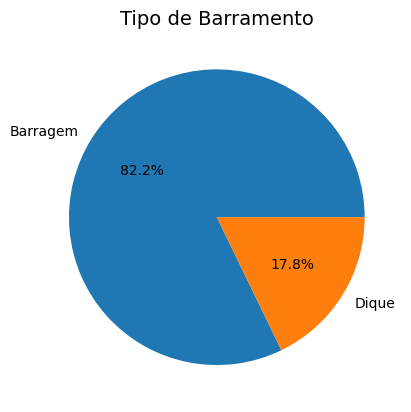

In [15]:
plt.title('Tipo de Barramento',fontsize=14)
plt.pie(seg_bar['DscTipo'].value_counts(),labels=seg_bar['DscTipo'].value_counts().index,
        autopct='%1.1f%%');

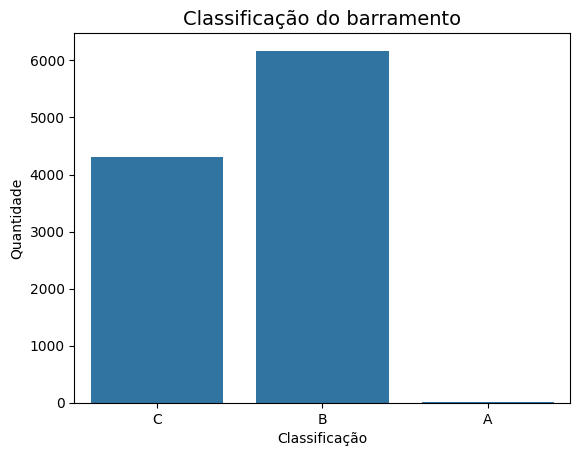

In [22]:
plt.title('Classificação do barramento',fontsize=14)
sns.countplot(x='IdcClassificacaoBarragens',data=seg_bar)
plt.xlabel('Classificação')
plt.ylabel('Quantidade');

Text(0, 0.5, 'Quantidade')

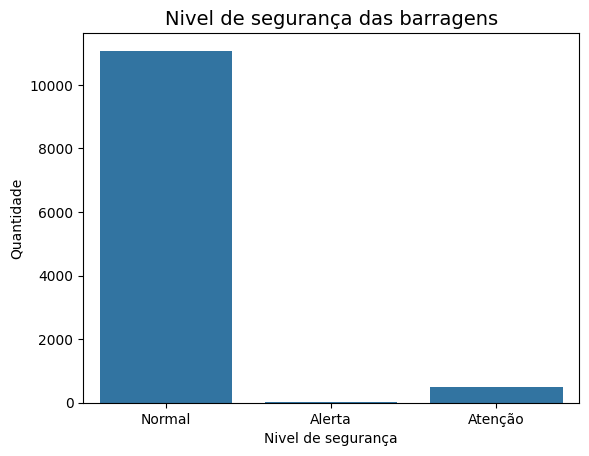

In [36]:
plt.title('Nivel de segurança das barragens',fontsize=14)
sns.countplot(x='DscNivelSegurancaBarragem',data=seg_bar)
plt.xlabel('Nivel de segurança')
plt.ylabel('Quantidade')

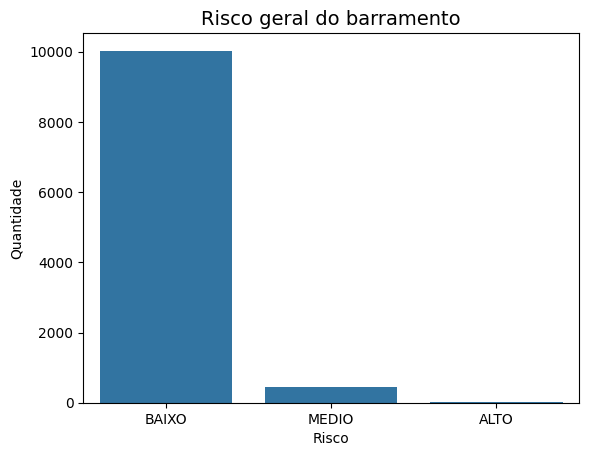

In [20]:
plt.title('Risco geral do barramento',fontsize=14)
sns.countplot(x='DscCategoriaRiscoGeral',data=seg_bar)
plt.xlabel('Risco')
plt.ylabel('Quantidade');

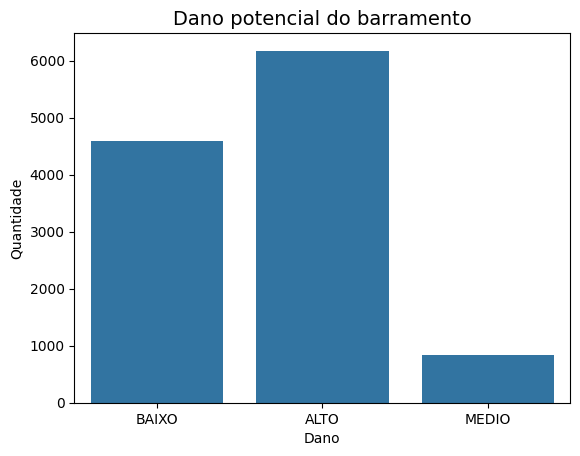

In [21]:
plt.title('Dano potencial do barramento',fontsize=14)
sns.countplot(x='DscDanoPotencialGeral',data=seg_bar)
plt.xlabel('Dano')
plt.ylabel('Quantidade');

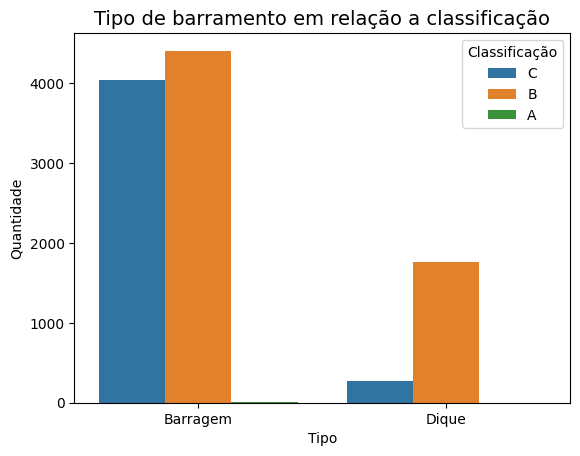

In [24]:
plt.title('Tipo de barramento em relação a classificação',fontsize=14)
sns.countplot(x='DscTipo',hue='IdcClassificacaoBarragens',data=seg_bar)
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.legend(title='Classificação');

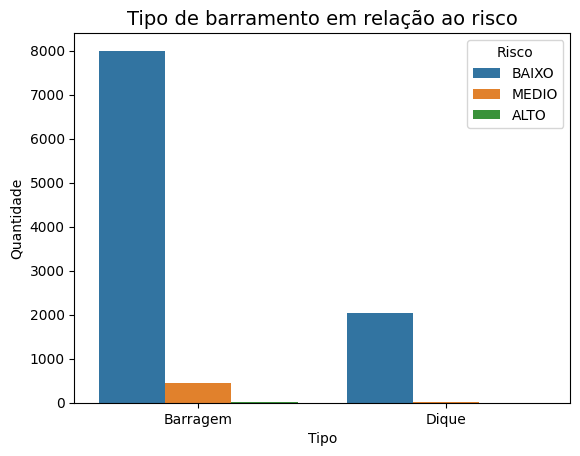

In [25]:
plt.title('Tipo de barramento em relação ao risco',fontsize=14)
sns.countplot(x='DscTipo',hue='DscCategoriaRiscoGeral',data=seg_bar)
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.legend(title='Risco');

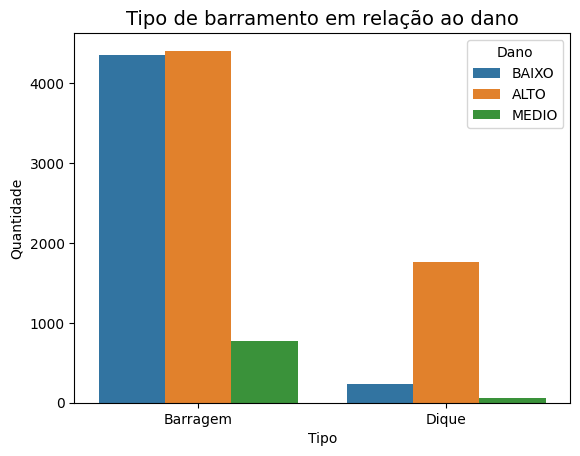

In [26]:
plt.title('Tipo de barramento em relação ao dano',fontsize=14)
sns.countplot(x='DscTipo',hue='DscDanoPotencialGeral',data=seg_bar)
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.legend(title='Dano');

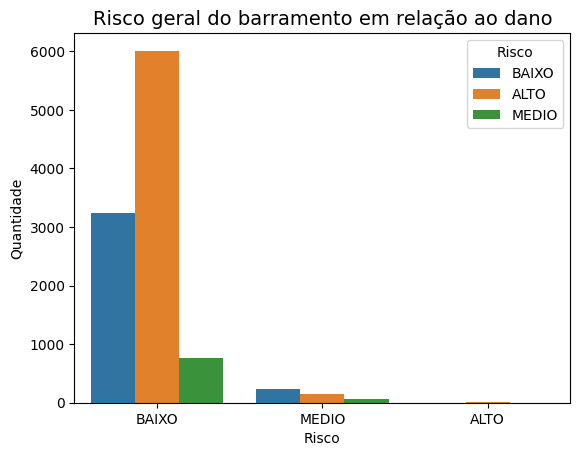

In [37]:
plt.title('Risco geral do barramento em relação ao dano',fontsize=14)
sns.countplot(x='DscCategoriaRiscoGeral',data=seg_bar,hue='DscDanoPotencialGeral')
plt.xlabel('Risco')
plt.ylabel('Quantidade')
plt.legend(title='Risco');

Text(0, 0.5, 'Quantidade')

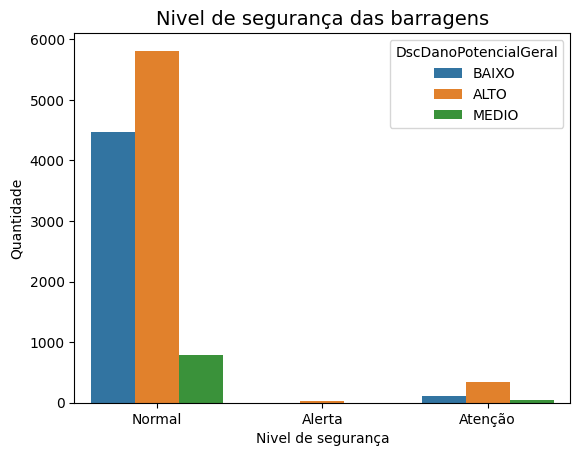

In [38]:
plt.title('Nivel de segurança das barragens',fontsize=14)
sns.countplot(x='DscNivelSegurancaBarragem',data=seg_bar, hue='DscDanoPotencialGeral')
plt.xlabel('Nivel de segurança')
plt.ylabel('Quantidade')

In [35]:
import plotly.express as px
px.parallel_categories(seg_bar.iloc[:,4:9],color_continuous_scale=px.colors.sequential.Inferno)